In [7]:
import xgboost as xgb
import numpy as np
import pandas as pd
import time
import pickle
import os
from math import log
import matplotlib.pyplot as plt
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,KFold, ParameterGrid,StratifiedKFold, cross_val_score

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, brier_score_loss, f1_score, log_loss,auc,roc_curve,auc

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
#from sklearn.utils.fixes import signature

from datetime import datetime

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Corpus Classification")

In [10]:
df = pd.read_excel(os.getcwd()+r"\Data Files\New Categories\Corpus_AminoAcids.xlsx")

In [11]:
df.head()

,spend_group,spend_cat_raw_l1,spend_cat_raw_l2,spend_cat_raw_l3,spend_cat_raw_l4,spend_cat_raw_l5,material_group_master_data,material_group_master_data_desc,material,material_desc,...,account_number_desc,cost_center,cost_center_desc,invoice_amount,invoice_amt_rep_curr_mth_rate,label_l1,label_l2,label_l3,label_l4,label_l5
0,Raw,Amino Acids,AA/ Single,AA/ Single,AA/ Single,AA/ Single,R50,Amino Acids,22000290,Taurine Powder 10lb Kosher,...,N001/Not assigned,0042/#,0042/Not assigned,3125.00,3039.13,Amino Acids,AA/ Single,AA/ Single,AA/ Single,AA/ Single
1,Raw,Amino Acids,AA/ Single,AA/ Single,AA/ Single,AA/ Single,R50,Amino Acids,22000290,Taurine Powder 10lb Kosher,...,N001/Not assigned,0042/#,0042/Not assigned,2158.50,2138.82,Amino Acids,AA/ Single,AA/ Single,AA/ Single,AA/ Single
2,Raw,Amino Acids,AA/ Single,AA/ Single,Not assigned,Not assigned,R50,Amino Acids,43947841,Amino Acid Glycine Powder 20kg,...,N001/Not assigned,0028/#,0028/Not assigned,99959.75,22253.30,Amino Acids,AA/ Single,AA/ Single,NaN,NaN
3,Raw,Amino Acids,AA/ Single,Not assigned,Not assigned,Not assigned,R50,Amino Acids,20340762,Amino Acid L-Arginine 10kg,...,N001/Not assigned,0028/#,0028/Not assigned,1039381.92,240511.41,Amino Acids,AA/ Single,NaN,NaN,NaN
4,Raw,Amino Acids,AA/ Single,Not assigned,Not assigned,Not assigned,R50,Amino Acids,20340763,Amino Acid L-Histidine,...,N001/Not assigned,0011/#,0011/Not assigned,109608.81,2522.86,Amino Acids,AA/ Single,NaN,NaN,NaN


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["label_l2"])
df["label_l2_enc"]=le.transform(df["label_l2"])

df["CONCATED_COLUMN"] = df["material_descr_from_po"]+" "+df["vendor_desc"]+" "+df["account_number_desc"]+" "+df["cost_center_desc"]

# df["label_l2_enc"]=pd.get_dummies(df['label_l2']).values

In [13]:
x_column = ["material_descr_from_po","vendor_desc","account_number_desc","cost_center_desc","CONCATED_COLUMN"]
y_column = ["label_l2_enc"]
seed = 10

In [14]:
df.label_l2.value_counts()

AA/ Single     356
AA/ Pre Mix     12
Name: label_l2, dtype: int64

In [15]:
X_train_1, X_test, y_train_1, y_test = train_test_split(df[x_column], df[y_column], test_size=0.2, random_state=seed)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=seed)

In [16]:
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)
X_valid.reset_index(inplace = True)


In [17]:
print("Train sample : %.0f \t 24 MRO Services : %.1f \t 24 Workshop Equipment&Supplies : %.1f \tIndustrial Gases : %.1f" % (X_train.shape[0],
                                 round((y_train=="24 MRO Services").sum()/y_train.count()*100,2),
                                 round((y_train=="24 Workshop Equipment&Supplies").sum()/y_train.count()*100,2),
                                 round((y_train=="24 Industrial Gases").sum()/y_train.count()*100,2))
     )

print("valid sample : %.0f \t 24 MRO Services : %.1f \t 24 Workshop Equipment&Supplies : %.1f \tIndustrial Gases : %.1f" % (X_valid.shape[0],
                                 round((y_valid=="24 MRO Services").sum()/y_valid.count()*100,2),
                                 round((y_valid=="24 Workshop Equipment&Supplies").sum()/y_valid.count()*100,2),
                                 round((y_valid=="24 Industrial Gases").sum()/y_valid.count()*100,2))
     )

print("test sample : %.0f \t 24 MRO Services : %.1f \t 24 Workshop Equipment&Supplies : %.1f \tIndustrial Gases : %.1f" % (X_test.shape[0],
                                 round((y_test=="24 MRO Services").sum()/y_test.count()*100,2),
                                 round((y_test=="24 Workshop Equipment&Supplies").sum()/y_test.count()*100,2),
                                 round((y_test=="24 Industrial Gases").sum()/y_test.count()*100,2))
     )

Train sample : 235 	 24 MRO Services : 0.0 	 24 Workshop Equipment&Supplies : 0.0 	Industrial Gases : 0.0
valid sample : 59 	 24 MRO Services : 0.0 	 24 Workshop Equipment&Supplies : 0.0 	Industrial Gases : 0.0
test sample : 74 	 24 MRO Services : 0.0 	 24 Workshop Equipment&Supplies : 0.0 	Industrial Gases : 0.0


C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the f

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

selected_col = "CONCATED_COLUMN"

sentences_train = X_train[selected_col].values
sentences_valid = X_valid[selected_col].values
sentences_test = X_test[selected_col].values

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)


maxlen = 26


X_train = X_train.merge(pd.DataFrame(pad_sequences(tokenizer.texts_to_sequences(sentences_train), padding='post', maxlen=maxlen)),left_index=True, right_index = True)
X_test = X_test.merge(pd.DataFrame(pad_sequences(tokenizer.texts_to_sequences(sentences_test), padding='post', maxlen=maxlen)),left_index=True, right_index = True)
X_valid = X_valid.merge(pd.DataFrame(pad_sequences(tokenizer.texts_to_sequences(sentences_valid), padding='post', maxlen=maxlen)),left_index=True, right_index = True)
# X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

# print(sentences_train[2])
# print(X_train[2])

In [19]:
# from sklearn.feature_extraction.text import CountVectorizer

# for selected_col in x_column:
#     sentences_train = X_train[selected_col].values
#     sentences_valid = X_valid[selected_col].values
#     sentences_test = X_test[selected_col].values

#     vectorizer = CountVectorizer()
#     vectorizer.fit(sentences_train)

#     X_train = X_train.merge(pd.DataFrame(vectorizer.transform(sentences_train).toarray()),left_index=True, right_index = True)
#     X_valid = X_valid.merge(pd.DataFrame(vectorizer.transform(sentences_valid).toarray()),left_index=True, right_index = True)
#     X_test  = X_test.merge(pd.DataFrame(vectorizer.transform(sentences_test).toarray()),left_index=True, right_index = True)

In [20]:
all_col = list(X_train.columns)

In [21]:
all_col.remove('index')
all_col.remove('material_descr_from_po')
all_col.remove('vendor_desc')
all_col.remove('account_number_desc')
all_col.remove('cost_center_desc')
all_col.remove('CONCATED_COLUMN')

In [22]:
from keras.utils import to_categorical

# LSTM Model 

In [23]:
from keras.models import Sequential
from keras import layers

embedding_dim = 20

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
# model.add(layers.Flatten())
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(3, activation='sigmoid'))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 20)            6760      
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 26, 20)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               48400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 55,362
Trainable params: 55,362
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train[all_col], to_categorical(y_train),
                     epochs=100,
                     verbose=False,
                     validation_data=(X_valid[all_col], to_categorical(y_valid)),
                     batch_size=50)

In [21]:
loss, accuracy = model.evaluate(X_train[all_col], to_categorical(y_train), verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_valid[all_col], to_categorical(y_valid), verbose=False)
print("Valid Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test[all_col], to_categorical(y_test), verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Valid Accuracy:  0.9831
Testing Accuracy:  0.9730


In [22]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

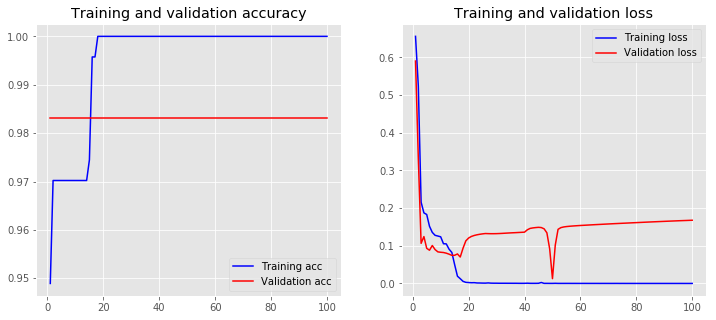

In [23]:
plot_history(history)

# Hyperparameter Tuning

In [24]:
# from keras.models import Sequential
# from keras import layers

# embedding_dim = 20

# model = Sequential()
# model.add(layers.Embedding(input_dim=vocab_size, 
#                            output_dim=embedding_dim, 
#                            input_length=maxlen))
# # model.add(layers.Flatten())
# # model.add(layers.Dense(10, activation='relu'))
# # model.add(layers.Dense(3, activation='sigmoid'))
# model.add(layers.SpatialDropout1D(0.2))
# model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(layers.Dense(3, activation='softmax'))

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.summary()

In [31]:
def create_model(learning_rate=0.01, activation='relu', embedding_dim=20, n_lstm=100, dropout = 0.2, recurrent_dropout=0.2):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
  
    # Create your binary classification model  
    

    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                               output_dim=embedding_dim, 
                               input_length=maxlen))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(n_dense, activation=activation))
#     model.add(layers.Dense(3, activation='sigmoid'))

    model.add(layers.SpatialDropout1D(dropout))
    model.add(layers.LSTM(n_lstm, dropout=dropout, recurrent_dropout=recurrent_dropout))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [32]:
params = {'activation': ["relu", "tanh"],
          'batch_size': [25, 32, 40], 
          'epochs': [10,12,15],
          'learning_rate': [0.01, 0.001, 0.0005],
          'embedding_dim' : [10,15,20,25,30],
          'n_lstm' : [50,70,100,120],
          'dropout' : [0.1,0.15,0.2,0.25,0.3], 
          'recurrent_dropout' : [0.1,0.15,0.2,0.25,0.3]
         }

In [33]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn = create_model,
                       verbose = 1)

In [34]:
random_search = RandomizedSearchCV(model,
                                   param_distributions = params, random_state = 10, n_iter = 20,
                                   cv = KFold(3), error_score=0, return_train_score =True)



In [35]:
print("Randomized search..")
search_time_start = time.time()
random_search.fit(X_train[all_col], to_categorical(y_train))
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Epoch 1/10
156/156 [==============================] - 4s 27ms/step - loss: 0.6338 - accuracy: 0.9615
Epoch 2/10
156/156 [==============================] - 1s 7ms/step - loss: 0.3686 - accuracy: 0.9744
Epoch 3/10
156/156 [==============================] - 2s 11ms/step - loss: 0.1615 - accuracy: 0.9744
Epoch 4/10
156/156 [==============================] - 2s 15ms/step - loss: 0.1655 - accuracy: 0.9744
Epoch 5/10
156/156 [==============================] - 1s 5ms/step - loss: 0.1318 - accuracy: 0.9744
Epoch 6/10
156/156 [==============================] - 1s 7ms/step - loss: 0.1207 - accuracy: 0.9744
Epoch 7/10
156/156 [==============================] - 1s 5ms/step - loss: 0.1097 - accuracy: 0.9744
Epoch 8/10
156/156 [==============================] - 1s 6ms/step - loss: 0.1179 - accuracy: 0.9744
Epoch 9/10
156/156 [==============================] - 1s 6ms/step - loss: 0.1116 - accuracy: 0.9744
Epoch 10/10
156/156 [==============================] - 0s 1ms/step
Epoch 1/10

156/156 [==============================] - 1s 4ms/step
Epoch 1/10
157/157 [==============================] - 5s 35ms/step - loss: 0.6640 - accuracy: 0.9172
Epoch 2/10
157/157 [==============================] - 1s 7ms/step - loss: 0.5765 - accuracy: 0.9682
Epoch 3/10
157/157 [==============================] - 1s 7ms/step - loss: 0.4105 - accuracy: 0.9682
Epoch 4/10
157/157 [==============================] - 1s 7ms/step - loss: 0.1555 - accuracy: 0.9682
Epoch 5/10
157/157 [==============================] - 1s 7ms/step - loss: 0.1972 - accuracy: 0.9682
Epoch 6/10
157/157 [==============================] - 1s 8ms/step - loss: 0.2271 - accuracy: 0.9682
Epoch 7/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1807 - accuracy: 0.9682
Epoch 8/10
157/157 [==============================] - 1s 8ms/step - loss: 0.1492 - accuracy: 0.9682
Epoch 9/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1363 - accuracy: 0.9682
Epoch 10/10
157/157 [=======================

Epoch 5/12
156/156 [==============================] - 1s 4ms/step - loss: 0.2698 - accuracy: 0.9744
Epoch 6/12
156/156 [==============================] - 1s 4ms/step - loss: 0.1210 - accuracy: 0.9744
Epoch 7/12
156/156 [==============================] - 1s 4ms/step - loss: 0.1438 - accuracy: 0.9744
Epoch 8/12
156/156 [==============================] - 1s 5ms/step - loss: 0.1765 - accuracy: 0.9744
Epoch 9/12
156/156 [==============================] - 1s 4ms/step - loss: 0.1489 - accuracy: 0.9744
Epoch 10/12
156/156 [==============================] - 1s 5ms/step - loss: 0.1373 - accuracy: 0.9744
Epoch 11/12
156/156 [==============================] - 1s 5ms/step - loss: 0.1060 - accuracy: 0.9744
Epoch 12/12
156/156 [==============================] - 0s 2ms/step
Epoch 1/12
157/157 [==============================] - 6s 35ms/step - loss: 0.6630 - accuracy: 0.9618
Epoch 2/12
157/157 [==============================] - 1s 4ms/step - loss: 0.6130 - accuracy: 0.9682
Epoch 3/12
157/157 [==========

156/156 [==============================] - 0s 2ms/step: 
Epoch 1/12
157/157 [==============================] - 8s 54ms/step - loss: 0.6696 - accuracy: 0.8599
Epoch 2/12
157/157 [==============================] - 1s 5ms/step - loss: 0.6018 - accuracy: 0.9682
Epoch 3/12
157/157 [==============================] - 1s 5ms/step - loss: 0.4921 - accuracy: 0.9682
Epoch 4/12
157/157 [==============================] - 1s 5ms/step - loss: 0.3026 - accuracy: 0.9682
Epoch 5/12
157/157 [==============================] - 1s 4ms/step - loss: 0.1561 - accuracy: 0.9682
Epoch 6/12
157/157 [==============================] - 1s 4ms/step - loss: 0.1627 - accuracy: 0.9682
Epoch 7/12
157/157 [==============================] - 1s 5ms/step - loss: 0.1849 - accuracy: 0.9682
Epoch 8/12
157/157 [==============================] - 1s 6ms/step - loss: 0.1567 - accuracy: 0.9682
Epoch 9/12
157/157 [==============================] - 1s 5ms/step - loss: 0.1576 - accuracy: 0.9682
Epoch 10/12
157/157 [=====================

157/157 [==============================] - 0s 673us/step
Epoch 1/15
156/156 [==============================] - 3s 20ms/step - loss: 0.6481 - accuracy: 0.9167
Epoch 2/15
156/156 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.9744
Epoch 3/15
156/156 [==============================] - 0s 3ms/step - loss: 0.1520 - accuracy: 0.9744
Epoch 4/15
156/156 [==============================] - 0s 3ms/step - loss: 0.1532 - accuracy: 0.9744
Epoch 5/15
156/156 [==============================] - 0s 3ms/step - loss: 0.1612 - accuracy: 0.9744
Epoch 6/15
156/156 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9744
Epoch 7/15
156/156 [==============================] - 1s 3ms/step - loss: 0.1202 - accuracy: 0.9744
Epoch 8/15
156/156 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9744
Epoch 9/15
156/156 [==============================] - 1s 4ms/step - loss: 0.1188 - accuracy: 0.9744
Epoch 10/15
156/156 [=====================

157/157 [==============================] - 4s 24ms/step - loss: 0.6535 - accuracy: 0.9299
Epoch 2/12
157/157 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.9682
Epoch 3/12
157/157 [==============================] - 0s 3ms/step - loss: 0.3334 - accuracy: 0.9682
Epoch 4/12
157/157 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9682
Epoch 5/12
157/157 [==============================] - 1s 3ms/step - loss: 0.1550 - accuracy: 0.9682
Epoch 6/12
157/157 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.9682
Epoch 7/12
157/157 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9682
Epoch 8/12
157/157 [==============================] - 1s 3ms/step - loss: 0.1431 - accuracy: 0.9682
Epoch 9/12
157/157 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.9682
Epoch 10/12
157/157 [==============================] - 1s 3ms/step - loss: 0.1351 - accuracy: 0.9682
Epoch 11/

In [36]:
print("Best Score: ",
      random_search.best_score_,
      "and Best Params: ",
      random_search.best_params_)

Best Score:  -0.07573548036013195 and Best Params:  {'recurrent_dropout': 0.2, 'n_lstm': 70, 'learning_rate': 0.01, 'epochs': 15, 'embedding_dim': 15, 'dropout': 0.15, 'batch_size': 25, 'activation': 'tanh'}


## Fit Best Model

In [37]:
model = create_model(learning_rate=0.01, activation='tanh', embedding_dim=15, n_lstm=70, dropout = 0.15, recurrent_dropout=0.2)

In [40]:
history = model.fit(X_train[all_col], to_categorical(y_train),
                     epochs=100,
                     verbose=False,
                     validation_data=(X_valid[all_col], to_categorical(y_valid)),
                     batch_size=25)

In [41]:
loss, accuracy = model.evaluate(X_train[all_col], to_categorical(y_train), verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_valid[all_col], to_categorical(y_valid), verbose=False)
print("Valid Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test[all_col], to_categorical(y_test), verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Valid Accuracy:  0.9831
Testing Accuracy:  0.9865


In [42]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

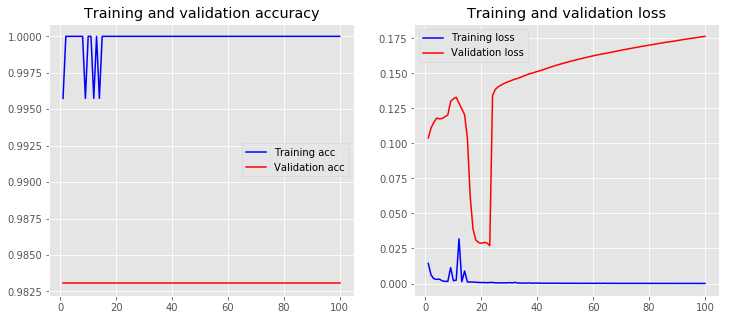

In [43]:
plot_history(history)

# Model Evaluation: Test Data

In [44]:
score, acc = model.evaluate(X_test[all_col], to_categorical(y_test),
                       batch_size=16, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.9864864945411682


Confusion matrix, without normalization


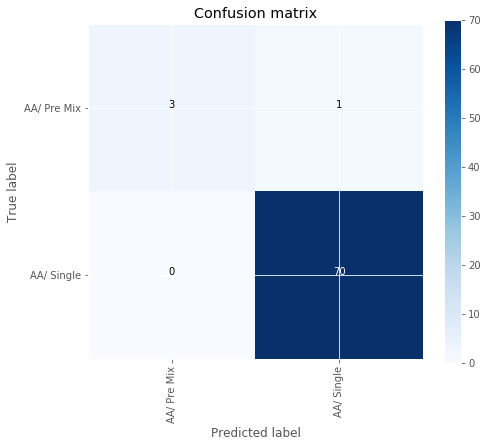

In [45]:
text_labels = le.classes_
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


y_pred = pd.DataFrame(model.predict_classes(X_test[all_col]));
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(7, 6, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(text_labels), normalize=False,
                      title='Confusion matrix')

fig.savefig("txt_classification_NN_BOW" + ".png", pad_inches=5.0)


In [46]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

0.8502024291497976

In [47]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, y_pred)


score_dic= {'Labels':text_labels,
           'precision':precision,
            'recall':recall,
            'fscore':fscore,
            'support':support
           }

pd.DataFrame(score_dic)


,Labels,precision,recall,fscore,support
0,AA/ Pre Mix,1.000000,0.75,0.857143,4
1,AA/ Single,0.985915,1.00,0.992908,70


In [50]:
tmp = pd.DataFrame(data = cnf_matrix,index = text_labels, columns = text_labels)
tmp["total"] = tmp.sum(axis=1)
accuracy= {"Category":[],"Accuracy":[]}
for i in range(tmp.shape[0]):
    accuracy["Category"].append(tmp.index[i])
    accuracy["Accuracy"].append(tmp.iloc[i,i]/tmp.loc[tmp.index[i],"total"])

print("Accuracy:")
print(pd.DataFrame(accuracy))

Accuracy:
      Category  Accuracy
0  AA/ Pre Mix      0.75
1   AA/ Single      1.00


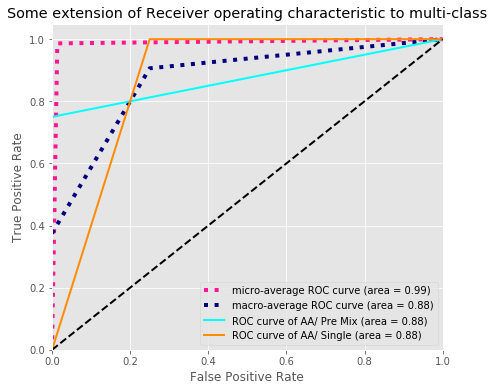

In [51]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

num_labels = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve((y_test==i), (y_pred == i))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(to_categorical(y_test).ravel(), to_categorical(y_pred).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_labels)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_labels):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_labels

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure()
fig.set_size_inches(7, 6, forward=True)
# plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_labels), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(text_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_labels):
    precision[i], recall[i], _ = precision_recall_curve((y_test==i), (y_pred == i))
    average_precision[i] = average_precision_score((y_test==i), (y_pred == i))

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test).ravel(), to_categorical(y_pred).ravel())
average_precision["micro"] = average_precision_score(to_categorical(y_test), to_categorical(y_pred),
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.98


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.98')

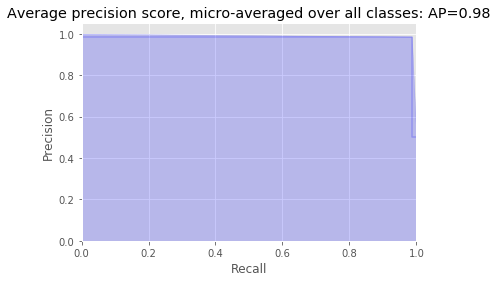

In [53]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')#,
                 #**step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

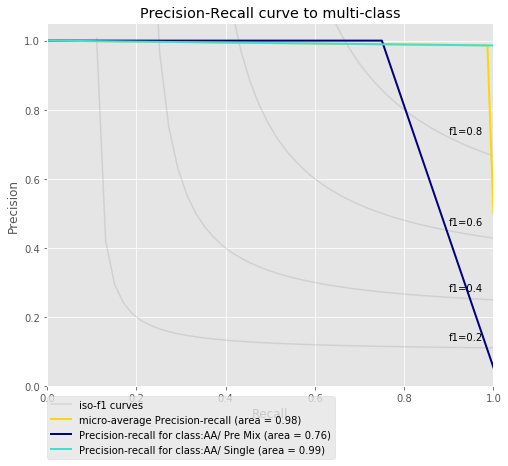

In [54]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(8, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(num_labels), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                  ''.format(text_labels[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.2), prop=dict(size=10))


plt.show()